<a href="https://colab.research.google.com/github/Derun-Chai/Assignment3/blob/https%2Fgithub.com%2FAlocinYerv%2FTulip.git/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Analyze data](#2-bullet)
3. [Manipulate data](#3-bullet)
4. [Model and validate data](#4-bullet)
5. [Predictions](#5-bullet)


# 1. Libraries and settings <a class="anchor" id="1-bullet"></a>

In [21]:
pip install --upgrade tensorflow


In [22]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.enable_eager_execution()


# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10
test_set_size_percentage = 10

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));


2.15.0
/: ['opt', 'libx32', 'root', 'mnt', 'bin', 'lib', 'srv', 'sbin', 'home', 'sys', 'usr', 'run', 'etc', 'tmp', 'boot', 'dev', 'media', 'proc', 'lib64', 'var', 'lib32', 'content', '.dockerenv', 'tools', 'datalab', 'python-apt', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
/content: ['.config', 'fundamentals.csv', 'diabetes-2.csv', 'securities.csv', 'prices.csv', 'prices-split-adjusted.csv', 'sample_data']


# 2. Analyze data <a class="anchor" id="2-bullet"></a>
- load stock prices from prices-split-adjusted.csv
- analyze data

In [23]:
# import all stock prices
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['PFG', 'PHM', 'IPG', 'AME', 'WMB', 'FLR', 'BBBY', 'HON', 'MOS', 'RL']


In [24]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [25]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


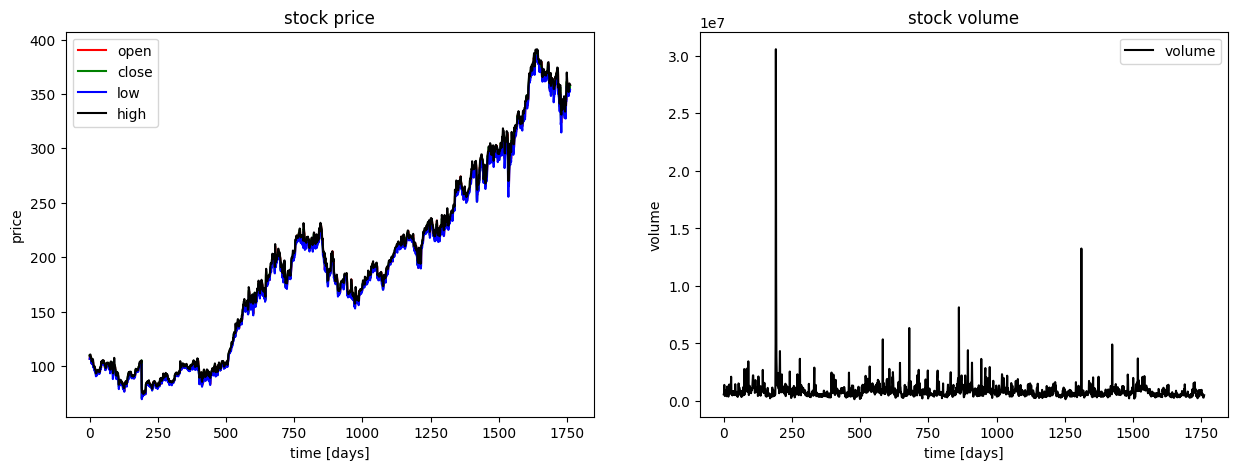

In [27]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# 3. Manipulate data <a class="anchor" id="3-bullet"></a>
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train, validation and test data sets

In [28]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.values # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]

    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]

    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


<ipython-input-28-98d95818bdb6>:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['symbol'],1,inplace=True)
<ipython-input-28-98d95818bdb6>:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['volume'],1,inplace=True)


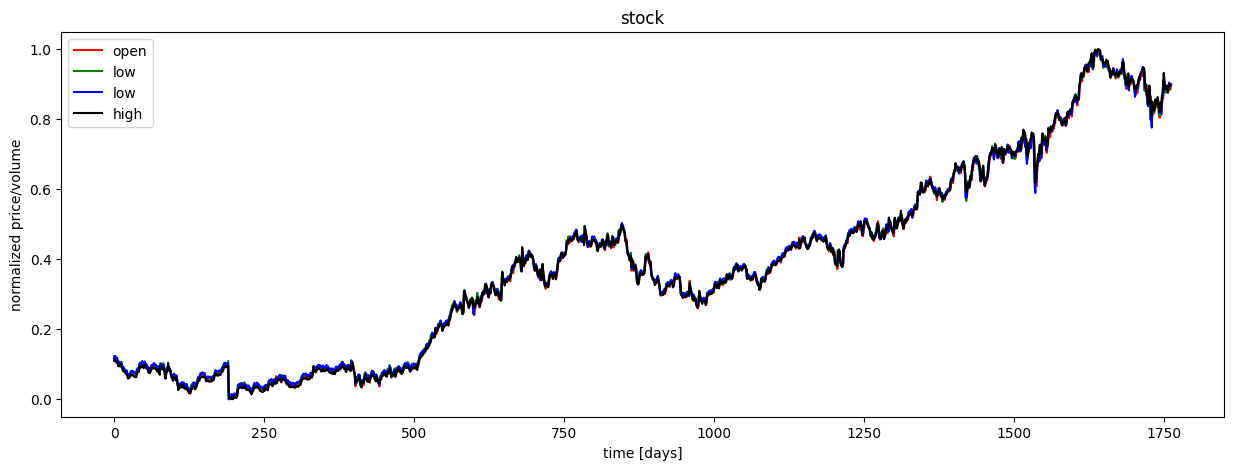

In [29]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

# 4. Model and validate data <a class="anchor" id="4-bullet"></a>
- RNNs with basic, LSTM, GRU cells


Epoch 1/60
17/17 [==============================] - 8s 77ms/step - loss: 2.4500 - val_loss: 0.6638
Epoch 2/60
17/17 [==============================] - 1s 61ms/step - loss: 0.8697 - val_loss: 1.5720
Epoch 3/60
17/17 [==============================] - 1s 63ms/step - loss: 0.9410 - val_loss: 5.2193
Epoch 4/60
17/17 [==============================] - 1s 63ms/step - loss: 0.4085 - val_loss: 0.1076
Epoch 5/60
17/17 [==============================] - 1s 63ms/step - loss: 0.0577 - val_loss: 0.2478
Epoch 6/60
17/17 [==============================] - 1s 76ms/step - loss: 0.0806 - val_loss: 0.2196
Epoch 7/60
17/17 [==============================] - 2s 115ms/step - loss: 0.0847 - val_loss: 0.2520
Epoch 8/60
17/17 [==============================] - 2s 124ms/step - loss: 0.0836 - val_loss: 0.1601
Epoch 9/60
17/17 [==============================] - 2s 123ms/step - loss: 0.0824 - val_loss: 0.2144
Epoch 10/60
17/17 [==============================] - 1s 63ms/step - loss: 0.0800 - val_loss: 0.0804
Epoch 

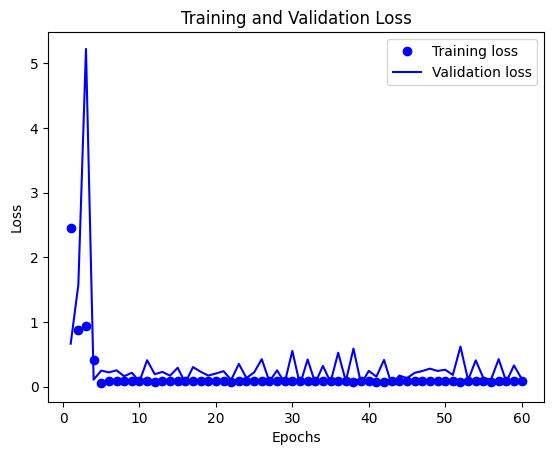

In [20]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# Function to get the next batch
def get_next_batch(batch_size, x_train, y_train, index_in_epoch, perm_array):
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array)
        start = 0
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# Model parameters
n_steps = seq_len - 1
n_inputs = 4
n_neurons = 300
n_outputs = 4
n_layers = 2
learning_rate = 0.0015
batch_size = 85
n_epochs = 60

# Build the model
model = tf.keras.Sequential()
for i in range(n_layers):
    if i == n_layers - 1:
        # Last layer does not return sequences
        model.add(tf.keras.layers.SimpleRNN(n_neurons, return_sequences=False))
    else:
        model.add(tf.keras.layers.SimpleRNN(n_neurons, return_sequences=True))
model.add(tf.keras.layers.Dense(n_outputs))


# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate), loss='mean_squared_error')
# Train the model
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))

# Training data preparation
perm_array = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)
index_in_epoch = 0


# Training loop
for epoch in range(n_epochs):
    for iteration in range(len(x_train) // batch_size):
        x_batch, y_batch = get_next_batch(batch_size, x_train, y_train, index_in_epoch, perm_array)
        model.train_on_batch(x_batch, y_batch)

        if iteration % (5 * len(x_train) // batch_size) == 0:
            mse_train = model.evaluate(x_train, y_train, verbose=0)
            mse_valid = model.evaluate(x_valid, y_valid, verbose=0)
            print(f'{epoch:.2f} epochs: MSE train/valid = {mse_train:.6f}/{mse_valid:.6f}')

# Predictions
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)
y_test_pred = model.predict(x_test)
# use Basic LSTM Cell
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons,
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]


# run graph
# Extract the history of loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Build the model using LSTM layers

Epoch 1/60
17/17 [==============================] - 7s 241ms/step - loss: 0.0265 - val_loss: 0.0354
Epoch 2/60
17/17 [==============================] - 4s 251ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 3/60
17/17 [==============================] - 5s 303ms/step - loss: 5.6926e-04 - val_loss: 0.0024
Epoch 4/60
17/17 [==============================] - 3s 195ms/step - loss: 3.5713e-04 - val_loss: 0.0016
Epoch 5/60
17/17 [==============================] - 3s 204ms/step - loss: 3.1655e-04 - val_loss: 0.0012
Epoch 6/60
17/17 [==============================] - 4s 215ms/step - loss: 3.0221e-04 - val_loss: 0.0012
Epoch 7/60
17/17 [==============================] - 5s 311ms/step - loss: 2.9419e-04 - val_loss: 0.0013
Epoch 8/60
17/17 [==============================] - 4s 203ms/step - loss: 2.8146e-04 - val_loss: 0.0012
Epoch 9/60
17/17 [==============================] - 3s 199ms/step - loss: 2.7974e-04 - val_loss: 0.0016
Epoch 10/60
17/17 [==============================] - 3s 195ms/step - los

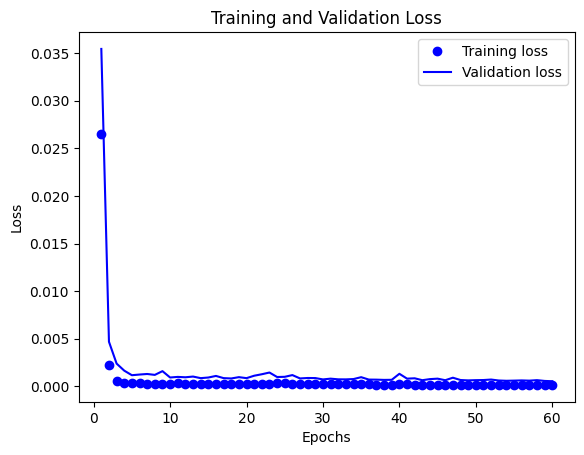

In [30]:
# Build the model using LSTM layers
model_LSTM = tf.keras.Sequential()
for i in range(n_layers - 1):
    model_LSTM.add(tf.keras.layers.LSTM(n_neurons, return_sequences=True, activation='tanh', recurrent_activation='sigmoid'))
model_LSTM.add(tf.keras.layers.LSTM(n_neurons, return_sequences=False, activation='tanh', recurrent_activation='sigmoid'))
model_LSTM.add(tf.keras.layers.Dense(n_outputs))
# Compile the model
model_LSTM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Assuming x_train, y_train, x_valid, y_valid are already defined
# Train the model
history_LSTM = model_LSTM.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))

# Make predictions
y_train_pred = model_LSTM.predict(x_train)
y_valid_pred = model_LSTM.predict(x_valid)
y_test_pred = model_LSTM.predict(x_test)
# run graph
# Extract the history of loss and validation loss
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/60
17/17 [==============================] - 13s 412ms/step - loss: 0.0218 - val_loss: 0.0291
Epoch 2/60
17/17 [==============================] - 7s 405ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 3/60
17/17 [==============================] - 6s 374ms/step - loss: 7.0118e-04 - val_loss: 0.0028
Epoch 4/60
17/17 [==============================] - 5s 320ms/step - loss: 5.2753e-04 - val_loss: 0.0025
Epoch 5/60
17/17 [==============================] - 8s 482ms/step - loss: 4.8917e-04 - val_loss: 0.0019
Epoch 6/60
17/17 [==============================] - 5s 316ms/step - loss: 4.6713e-04 - val_loss: 0.0016
Epoch 7/60
17/17 [==============================] - 6s 346ms/step - loss: 4.4300e-04 - val_loss: 0.0018
Epoch 8/60
17/17 [==============================] - 8s 442ms/step - loss: 4.5347e-04 - val_loss: 0.0011
Epoch 9/60
17/17 [==============================] - 5s 315ms/step - loss: 4.2574e-04 - val_loss: 0.0013
Epoch 10/60
17/17 [==============================] - 7s 439ms/step - lo

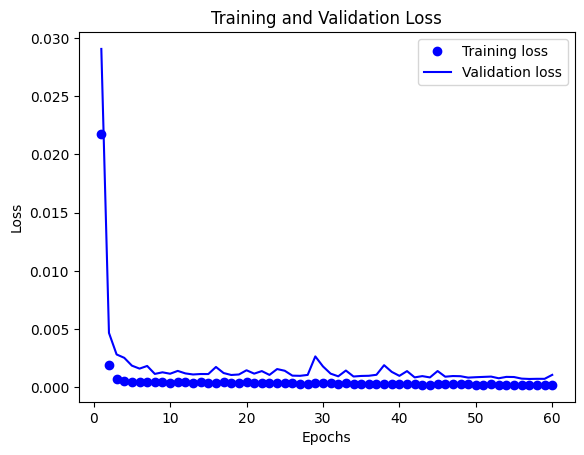

In [31]:
model_LSTM1 = tf.keras.Sequential([
    # Add LSTM layers, note that input shape is required for the first layer.
    tf.keras.layers.LSTM(n_neurons, return_sequences=True, input_shape=(19, n_inputs)),
    tf.keras.layers.LSTM(n_neurons, return_sequences=True),
    # You can only have return_sequences=False in the last LSTM layer
    tf.keras.layers.LSTM(n_neurons, return_sequences=False),
    # Output layer
    tf.keras.layers.Dense(n_outputs)
])

# Compile the model
model_LSTM1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model, assuming x_train, y_train, x_valid, y_valid are already defined
history_LSTM1 = model_LSTM1.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))
# Make predictions
y_train_pred = model_LSTM1.predict(x_train)
y_valid_pred = model_LSTM1.predict(x_valid)
y_test_pred = model_LSTM1.predict(x_test)
# run graph
# Extract the history of loss and validation loss
loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# use GRU cell

Epoch 1/60
17/17 [==============================] - 8s 213ms/step - loss: 0.0141 - val_loss: 0.0068
Epoch 2/60
17/17 [==============================] - 3s 163ms/step - loss: 9.7204e-04 - val_loss: 0.0013
Epoch 3/60
17/17 [==============================] - 3s 163ms/step - loss: 2.2829e-04 - val_loss: 5.8825e-04
Epoch 4/60
17/17 [==============================] - 3s 205ms/step - loss: 1.4218e-04 - val_loss: 4.8676e-04
Epoch 5/60
17/17 [==============================] - 4s 264ms/step - loss: 1.3181e-04 - val_loss: 4.8133e-04
Epoch 6/60
17/17 [==============================] - 3s 158ms/step - loss: 1.2971e-04 - val_loss: 4.7614e-04
Epoch 7/60
17/17 [==============================] - 3s 160ms/step - loss: 1.3227e-04 - val_loss: 4.5172e-04
Epoch 8/60
17/17 [==============================] - 3s 159ms/step - loss: 1.2876e-04 - val_loss: 4.6966e-04
Epoch 9/60
17/17 [==============================] - 3s 191ms/step - loss: 1.2457e-04 - val_loss: 4.5746e-04
Epoch 10/60
17/17 [=====================

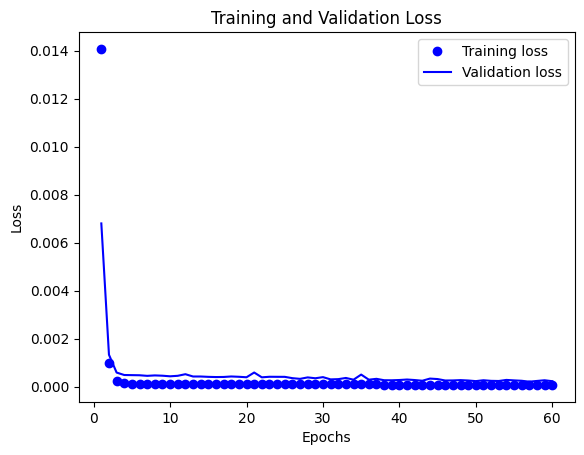

In [32]:
model_GRU = tf.keras.Sequential()
for _ in range(n_layers - 1):
    model_GRU.add(tf.keras.layers.GRU(n_neurons, return_sequences=True, activation='tanh'))
model_GRU.add(tf.keras.layers.GRU(n_neurons, activation='tanh'))  # Last layer does not return sequences
model_GRU.add(tf.keras.layers.Dense(n_outputs))

model_GRU.compile(optimizer='adam', loss='mean_squared_error')

history_GRU = model_GRU.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))
# Make predictions
y_train_pred = model_GRU.predict(x_train)
y_valid_pred = model_GRU.predict(x_valid)
y_test_pred = model_GRU.predict(x_test)
# run graph
# Extract the history of loss and validation loss
loss = history_GRU.history['loss']
val_loss = history_GRU.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. Predictions <a class="anchor" id="5-bullet"></a>

In [33]:
y_train.shape

(1394, 4)

correct sign prediction for close - open price for train/valid/test: 0.62/0.38/0.39


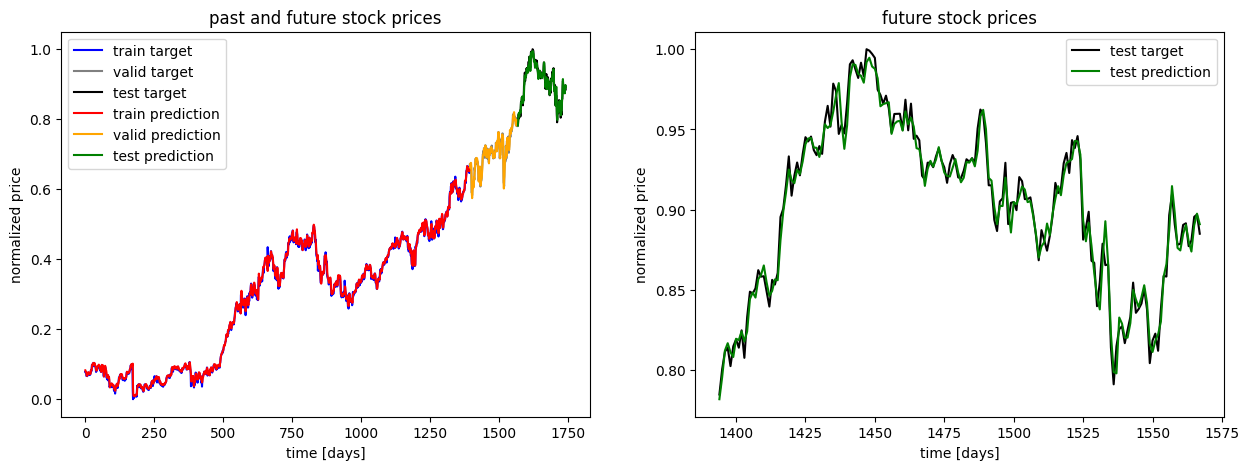

In [35]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
